In [8]:
%matplotlib inline

In [9]:
import numpy as np 
from matplotlib import pyplot as plt

In [10]:
import pandas as pd

In [11]:
from datetime import datetime, timedelta

In [12]:
dict_dtypes = {}
dict_dtypes['temp'] = {'Tmax(C)':float, 'Tmin(C)':float, 'Tmean(C)':float, 'RHmean(%)':float}
dict_dtypes['sun'] = dtype={'Amount(Hrs)':float}
dict_dtypes['rain'] = dtype={'Amount(mm)':float}

In [13]:
def make_index(df): 
    dfc = df.copy()
    dates = pd.to_datetime(dfc.loc[:,'Date(NZST)'], dayfirst=True)
    hours = dfc.loc[:,'Time(NZST)']
    hours = [int(h.split(':')[0]) for h in hours]
    datetimes = [d[0] + timedelta(hours = d[1]) for d in zip(dates, hours)]
    dfc.index = datetimes
    datetimes = pd.date_range(start=dfc.index[0], end=dfc.index[-1], freq='1H')
    dfc = dfc.reindex(datetimes)
    return dfc

In [14]:
def select_morning(df, resample=True): 
    df_day = df.between_time('05:00', '9:00')
    if resample: 
        df_day = df_day.resample('1D').mean() 
    return df_day

In [15]:
def select_day(df, resample=True): 
    df_day = df.between_time('06:00', '19:00')
    if resample: 
        df_day = df_day.resample('1D').mean() 
    return df_day

In [16]:
def select_commute(df): 
    df_morning = df.between_time('06:00', '09:00')
    df_eve = df.between_time('16:00', '18:00')
    df_morning = df_morning.resample('1D').mean() 
    df_eve = df_eve.resample('1D').mean()
    df_commute = (df_morning + df_eve) / 2 
    return df_commute

In [17]:
temp = pd.read_csv('../data/weather/hourly/mangere hourly temp.csv', dtype=dict_dtypes['temp'], na_values=['-'])

In [18]:
temp.columns

Index(['Station', 'Date(NZST)', 'Time(NZST)', 'Tmax(C)', 'Period(Hrs)',
       'Tmin(C)', 'Period(Hrs).1', 'Tgmin(C)', 'Period(Hrs).2', 'Tmean(C)',
       'RHmean(%)', 'Period(Hrs).3', 'Freq'],
      dtype='object')

In [19]:
temp = temp.drop(['Period(Hrs)', 'Period(Hrs).1', 'Period(Hrs).2', 'Period(Hrs).3','Freq'], axis=1)

In [20]:
temp.head()

,Station,Date(NZST),Time(NZST),Tmax(C),Tmin(C),Tgmin(C),Tmean(C),RHmean(%)
0,"Auckland, Mangere Ews",1/01/2012,0:00,20.2,19.8,19.6,20.2,92.0
1,"Auckland, Mangere Ews",1/01/2012,1:00,20.0,19.7,19.5,19.8,94.0
2,"Auckland, Mangere Ews",1/01/2012,2:00,20.1,19.7,19.5,19.9,94.0
3,"Auckland, Mangere Ews",1/01/2012,3:00,19.8,19.6,19.3,19.8,94.0
4,"Auckland, Mangere Ews",1/01/2012,4:00,19.8,19.4,19.2,19.6,93.0


In [21]:
temp = make_index(temp)

In [22]:
temp.head()

,Station,Date(NZST),Time(NZST),Tmax(C),Tmin(C),Tgmin(C),Tmean(C),RHmean(%)
2012-01-01 00:00:00,"Auckland, Mangere Ews",1/01/2012,0:00,20.2,19.8,19.6,20.2,92.0
2012-01-01 01:00:00,"Auckland, Mangere Ews",1/01/2012,1:00,20.0,19.7,19.5,19.8,94.0
2012-01-01 02:00:00,"Auckland, Mangere Ews",1/01/2012,2:00,20.1,19.7,19.5,19.9,94.0
2012-01-01 03:00:00,"Auckland, Mangere Ews",1/01/2012,3:00,19.8,19.6,19.3,19.8,94.0
2012-01-01 04:00:00,"Auckland, Mangere Ews",1/01/2012,4:00,19.8,19.4,19.2,19.6,93.0


In [23]:
temp_hourly_day = select_day(temp, resample=False)

In [25]:
temp_hourly_day.to_csv('../data/weather/hourly/temp_hourly_daytime.csv')

In [26]:
sun = pd.read_csv('../data/weather/hourly/mangere hourly sun.csv', dtype=dict_dtypes['sun'], na_values=['-'])

In [27]:
sun.head()

,Station,Date(NZST),Time(NZST),Amount(Hrs),Period(Hrs),Freq
0,"Auckland, Mangere Ews",1/01/2012,0:00,0.0,1,H
1,"Auckland, Mangere Ews",1/01/2012,1:00,0.0,1,H
2,"Auckland, Mangere Ews",1/01/2012,2:00,0.0,1,H
3,"Auckland, Mangere Ews",1/01/2012,3:00,0.0,1,H
4,"Auckland, Mangere Ews",1/01/2012,4:00,0.0,1,H


In [28]:
sun = sun.drop(['Period(Hrs)','Freq'], axis=1)

In [29]:
sun = make_index(sun)

In [30]:
sun.head()

,Station,Date(NZST),Time(NZST),Amount(Hrs)
2012-01-01 00:00:00,"Auckland, Mangere Ews",1/01/2012,0:00,0.0
2012-01-01 01:00:00,"Auckland, Mangere Ews",1/01/2012,1:00,0.0
2012-01-01 02:00:00,"Auckland, Mangere Ews",1/01/2012,2:00,0.0
2012-01-01 03:00:00,"Auckland, Mangere Ews",1/01/2012,3:00,0.0
2012-01-01 04:00:00,"Auckland, Mangere Ews",1/01/2012,4:00,0.0


In [31]:
sun_hourly_day = select_day(sun, resample=False)

In [32]:
sun_hourly_day.to_csv('../data/weather/hourly/sun_hourly_daytime.csv')

In [45]:
rain = pd.read_csv('../data/weather/hourly/Mangere hourly rain.csv', dtype=dict_dtypes['rain'], na_values=['|-'])

In [46]:
rain.head()

,Station,Date(NZST),Time(NZST),Amount(mm),Period(Hrs),Freq
0,"Auckland, Mangere Ews",1/01/2012,00:00,0.0,1,H
1,"Auckland, Mangere Ews",1/01/2012,01:00,0.0,1,H
2,"Auckland, Mangere Ews",1/01/2012,02:00,1.0,1,H
3,"Auckland, Mangere Ews",1/01/2012,03:00,0.1,1,H
4,"Auckland, Mangere Ews",1/01/2012,04:00,0.0,1,H


In [47]:
rain = rain.drop(['Period(Hrs)','Freq'], axis=1)

In [48]:
rain = make_index(rain)

In [49]:
rain.head()

,Station,Date(NZST),Time(NZST),Amount(mm)
2012-01-01 00:00:00,"Auckland, Mangere Ews",1/01/2012,00:00,0.0
2012-01-01 01:00:00,"Auckland, Mangere Ews",1/01/2012,01:00,0.0
2012-01-01 02:00:00,"Auckland, Mangere Ews",1/01/2012,02:00,1.0
2012-01-01 03:00:00,"Auckland, Mangere Ews",1/01/2012,03:00,0.1
2012-01-01 04:00:00,"Auckland, Mangere Ews",1/01/2012,04:00,0.0


In [50]:
rain_hourly_day = select_day(rain, resample=False)

In [51]:
rain_hourly_day.to_csv('../data/weather/hourly/rain_hourly_daytime.csv')

In [40]:
wind = pd.read_csv('../data/weather/hourly/mangere_wind.csv', index_col=0, parse_dates=True)

In [41]:
wind.head()

,Dir(DegT),Speed(m/s)
2011-01-01 00:00:00,220.0,6.6
2011-01-01 01:00:00,220.0,7.8
2011-01-01 02:00:00,218.0,7.4
2011-01-01 03:00:00,221.0,5.8
2011-01-01 04:00:00,224.0,7.4


In [43]:
wind_hourly_day = select_day(wind, resample=False)

In [44]:
wind_hourly_day.to_csv('../data/weather/hourly/wind_hourly_daytime.csv')

In [143]:
# rain_commute = select_commute(rain)
# rain_day = select_day(rain)
rain_morning = select_morning(rain)

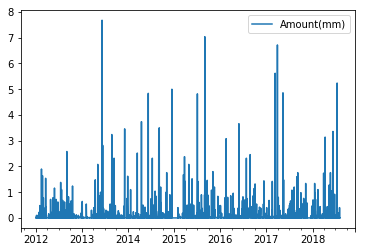

In [144]:
rain_morning.plot()

In [145]:
# temp_commute = select_commute(temp)
# temp_day = select_day(temp)
temp_morning = select_morning(temp)


In [146]:
# sun_commute = select_commute(sun)
# sun_day = select_day(sun)
sun_morning = select_morning(sun)

In [148]:
# wind_commute = select_commute(wind)
# wind_day = select_day(wind)
wind_morning = select_morning(wind)

In [149]:
# sun_commute.to_csv('../data/weather/hourly/commute/sun_commute.csv')
# sun_day.to_csv('../data/weather/hourly/commute/sun_day.csv')
# sun_morning.to_csv('../data/weather/hourly/commute/sun_morning.csv')

In [150]:
# rain_commute.to_csv('../data/weather/hourly/commute/rain_commute.csv')
# rain_day.to_csv('../data/weather/hourly/commute/rain_day.csv')
# rain_morning.to_csv('../data/weather/hourly/commute/rain_morning.csv')

In [151]:
# temp_commute.to_csv('../data/weather/hourly/commute/temp_commute.csv')
# temp_day.to_csv('../data/weather/hourly/commute/temp_day.csv')
# temp_morning.to_csv('../data/weather/hourly/commute/temp_morning.csv')

In [152]:
# wind_commute.to_csv('../data/weather/hourly/commute/wind_commute.csv')
# wind_day.to_csv('../data/weather/hourly/commute/wind_day.csv')
# wind_morning.to_csv('../data/weather/hourly/commute/wind_morning.csv')